<a href="https://colab.research.google.com/github/tanseersaji/titanic_dataset_sklearn/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Survival prediction - Titanic

This project will predict survivers using Multiple Classifiers and compare which model gives maximum accuracy.

### Step 1
Import libraries and preprocess training and testing dataset.

Titanic Dataset is downloaded from Kaggle ([Download Here](https://www.kaggle.com/broaniki/titanic))

In [25]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('train.csv',dtype={"Age": np.float64})
train_data = train_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
train_data = train_data.dropna()
train_data['Sex'].replace(['female','male'],[0,1],inplace=True)

X_train = train_data.drop(['Survived'],axis=1)
Y_train = train_data['Survived']

X_train = X_train.values.tolist()
Y_train = Y_train.values.tolist()

print(len(train_data),"Training Data loaded.")

test_data = pd.read_csv('test.csv',dtype={"Age": np.float64})
test_result = pd.read_csv('gender_submission.csv')
test_data = pd.concat([test_data,test_result],axis=1)
test_data = test_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)
test_data = test_data.dropna()
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)


X_test = test_data.drop(['Survived'],axis=1)
Y_test = test_data['Survived']

X_test = X_test.values.tolist()
Y_test = Y_test.values.tolist()

print(len(test_data),"Testing Data loaded.")

714 Training Data loaded.
332 Testing Data loaded.


### Step 2

Predicting whether a passenger had survived or not is a classification problem, therefore next step will be to load all available classifier in SciKit Learn

In [70]:
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
classifiers=[est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
print(len(classifiers),"classifiers loaded.")

30 classifiers loaded.


### Step 3
Now we can iterate through each classifier and train and test using each one.

In [0]:
accuracy = [] 
classifier_label = []
    
from sklearn.metrics import accuracy_score
for classifier in classifiers:
  try:
    print("Classifer Trained:",classifier[0])
    c = classifier[1]()
    c.fit(X_train,Y_train)

    Y_pred = c.predict(X_test)

    accuracy.append(accuracy_score(Y_test,Y_pred)*100)
    classifier_label.append(classifier[0])
  except:
    pass

### Step 4
Plot the graph of each classification model and corresponding accuracy (in %) achived using that model.

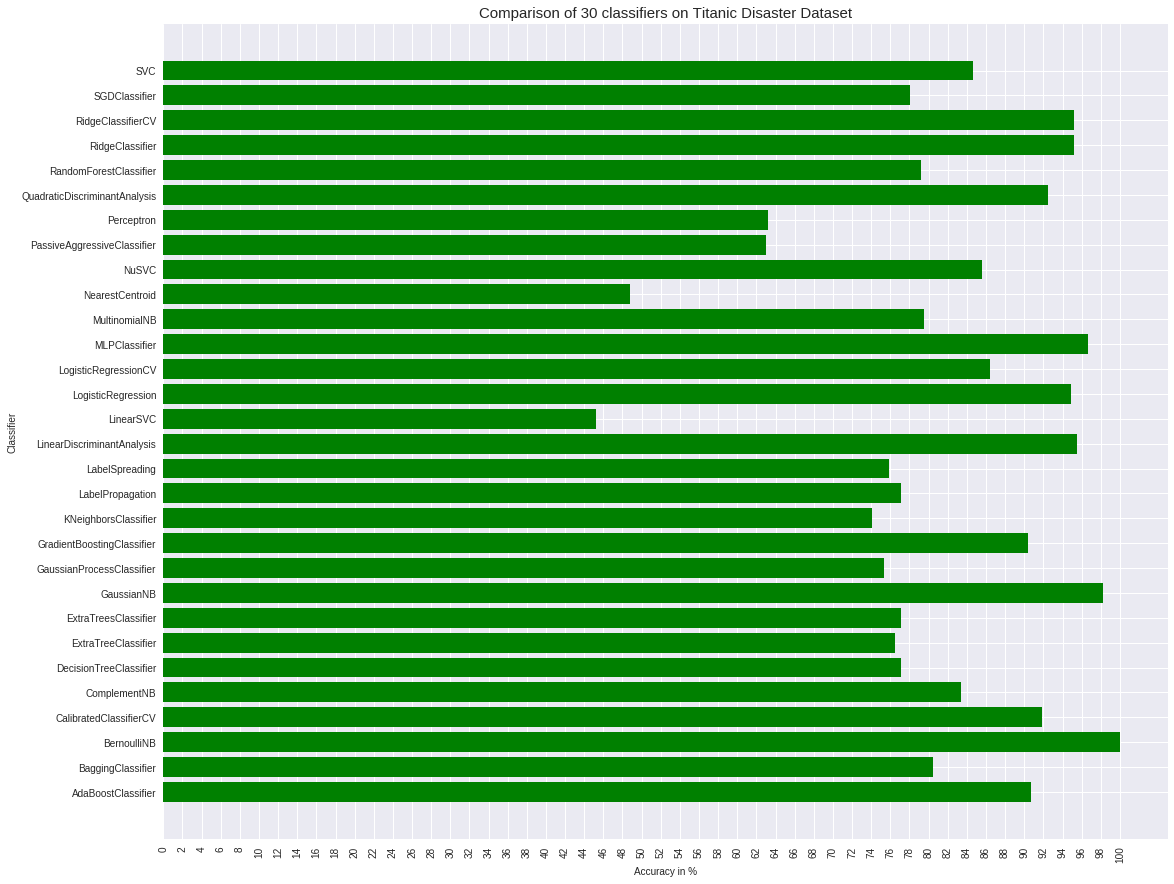

In [69]:
import matplotlib.pyplot as plt

index = np.arange(len(classifier_label))
plt.figure(figsize=(18, 15))
plt.barh(index, accuracy,height = 0.8,align='center',color='green')
plt.ylabel('Classifier', fontsize=10)
plt.xlabel('Accuracy in %', fontsize=10)
plt.yticks(index, classifier_label, fontsize=10)
plt.xticks(np.arange(0, 101, 2.0),rotation=90)
plt.title('Comparison of {} classifiers on Titanic Disaster Dataset'.format(len(index)),fontsize=15)
plt.show()